In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [4]:
mnist = fetch_openml('mnist_784')
mnist.data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

In [6]:
mnist.target.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [11]:
df_x = mnist.data
df_y = mnist.target

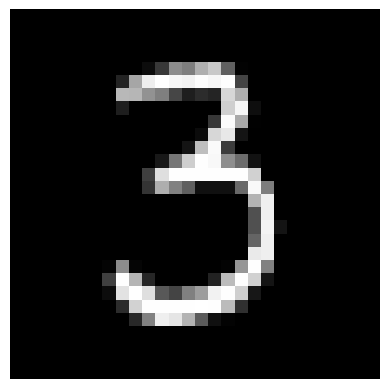

In [18]:
from PIL import Image

first_image = np.array(df_x.iloc[50]).reshape(28,28)

plt.imshow(first_image, cmap='gray')
plt.axis('off')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 1/7, random_state = 43)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
from sklearn.decomposition import PCA

pca_model = PCA(.95)
pca_model

PCA(n_components=0.95)

In [43]:
x_train_pca = pca_model.fit_transform(x_train)
x_test_pca = pca_model.transform(x_test)
pca_model.n_components_

np.int64(330)

In [23]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver = 'lbfgs', max_iter = 10000)

In [27]:
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [44]:
log_reg_pca = LogisticRegression(solver = 'lbfgs', max_iter = 10000)

In [45]:
log_reg_pca.fit(x_train_pca, y_train)

LogisticRegression(max_iter=10000)

In [36]:
logreg.predict(x_test[4360].reshape(1,-1))

array(['8'], dtype=object)

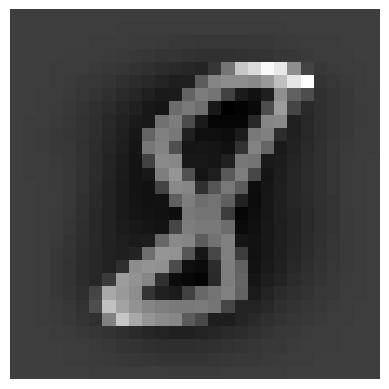

In [37]:
plt.imshow(x_test[4360].reshape(28,28), cmap='gray')
plt.axis('off')
plt.show()

In [38]:
y_pred = logreg.predict(x_test)

In [46]:
y_pred_pca = log_reg_pca.predict(x_test_pca)

In [41]:
from sklearn.metrics import accuracy_score, classification_report

print("The performance of the model is {}%" .format(accuracy_score(y_pred, y_test)*100))

The performance of the model is 91.25%


In [47]:
print("The performance of the model is {}%" .format(accuracy_score(y_pred_pca, y_test)*100))

The performance of the model is 91.93%


In [42]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       953
           1       0.97      0.93      0.95      1140
           2       0.89      0.91      0.90       990
           3       0.89      0.88      0.89      1009
           4       0.93      0.92      0.92       988
           5       0.86      0.89      0.87       893
           6       0.94      0.94      0.94      1017
           7       0.92      0.93      0.93      1080
           8       0.87      0.88      0.88       952
           9       0.88      0.88      0.88       978

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [48]:
print(classification_report(y_pred_pca, y_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       958
           1       0.97      0.94      0.96      1130
           2       0.91      0.92      0.91      1008
           3       0.90      0.90      0.90       993
           4       0.93      0.93      0.93       979
           5       0.86      0.89      0.88       895
           6       0.95      0.95      0.95      1012
           7       0.93      0.93      0.93      1098
           8       0.87      0.88      0.88       950
           9       0.89      0.89      0.89       977

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

